In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with EDLAE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.edlae import EDLAE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EDLAE

L2 = [10 ** p for p in range(2, 6)]
RHO = [100, 500, 1000]
MAX_ITER = 15
HYPERPARAMS = {'l2': L2, 'rho': RHO, 'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2': [100, 1000, 10000, 100000],
 'rho': [100, 500, 1000],
 'max_iterations': 15}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
HYPERPARAMS['t'] = t
del S

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model EDLAE with hyperparameters {'l2': 100, 'rho': 100, 'max_iterations': 15, 't': 1688}


norm E 1.2804096649946781
norm D 522.9583365916501
diag norm: 9.479058497910462
diag_diff: 8.143239789315913

norm E 1.1306822686547295
norm D 546.302008002762
diag norm: 9.077957457001638
diag_diff: 6.036852713264481
rho * change E: 48.47095422805753

norm E 1.0954034532375794
norm D 551.6347303060618
diag norm: 8.824804065454332
diag_diff: 4.42287236385789
rho * change E: 14.687049391100214

norm E 1.0853453931497494
norm D 553.6268204466941
diag norm: 8.702852559778606
diag_diff: 3.2573926804711624
rho * change E: 7.235840738773062

norm E 1.0862432711023846
norm D 554.5878819778102
diag norm: 8.641084246174717
diag_diff: 2.416278883613223
rho * change E: 4.436889209531529

norm E 1.0902238039579901
norm D 555.1012063298027
diag norm: 8.606840746083098
diag_diff: 1.8062117799072934
rho * change E: 3.120517053615155

norm E 1.0943986900411975
norm D 555.3941613958772
diag norm: 8.586503367825063
diag_diff: 1.3612273661025067
rho * change E: 2.3202746752946424

norm E 1.09798392122001

norm E 0.23043716325267138
norm D 550.8478828793361
diag norm: 1.9143823206885149
diag_diff: 1.866780057035422

norm E 0.22829141977021897
norm D 566.8167271225818
diag norm: 1.9800159129165853
diag_diff: 1.8279527020136483
rho * change E: 5.396483558851774

norm E 0.22545903596827727
norm D 569.9197791004152
diag norm: 1.9548933168259262
diag_diff: 1.7009873733322491
rho * change E: 1.7260202827036633

norm E 0.22275726637193502
norm D 571.1851076821132
diag norm: 1.9275909912647549
diag_diff: 1.5784084707648218
rho * change E: 1.0095216043646384

norm E 0.22027372136582188
norm D 571.9290677905473
diag norm: 1.9024219399306972
diag_diff: 1.4645468260361456
rho * change E: 0.7525379119818529

norm E 0.21802233989986666
norm D 572.4605823713786
diag norm: 1.8800497974213262
diag_diff: 1.3596162059935828
rho * change E: 0.624251595138978

norm E 0.215998446572336
norm D 572.878654126004
diag norm: 1.8604806000648746
diag_diff: 1.2629803561459099
rho * change E: 0.5408304411823454

norm 

norm E 0.027551174542541943
norm D 554.1962691988214
diag norm: 0.22469476376992303
diag_diff: 0.22453599488003195

norm E 0.02798151316198433
norm D 569.8913498544058
diag norm: 0.23928116514790848
diag_diff: 0.23800375673224458
rho * change E: 0.5620100118873486

norm E 0.02794977222456815
norm D 572.724826180494
diag norm: 0.23940122333709266
diag_diff: 0.23694820639584055
rho * change E: 0.17546412402194578

norm E 0.02788257645318342
norm D 573.7049063513765
diag norm: 0.23866300443570176
diag_diff: 0.23502860327397465
rho * change E: 0.09285068141681191

norm E 0.027807959694305388
norm D 574.1570616373543
diag norm: 0.23774284032962406
diag_diff: 0.2329328953984732
rho * change E: 0.059797524530894625

norm E 0.027731384359850526
norm D 574.4037200308004
diag norm: 0.23676671611087977
diag_diff: 0.23079089471440117
rho * change E: 0.04312892192771488

norm E 0.02765444570684838
norm D 574.5544013388062
diag norm: 0.23577190701983333
diag_diff: 0.22864149885832383
rho * change E:

norm E 0.002823535435341647
norm D 554.9280801853962
diag norm: 0.022935222853538068
diag_diff: 0.022935222853538068

norm E 0.002878258363243157
norm D 570.675136933202
diag norm: 0.02455926789218848
diag_diff: 0.024555675711917267
rho * change E: 0.056633546407755156

norm E 0.002882274799774858
norm D 573.5097751421235
diag norm: 0.02466388463498911
diag_diff: 0.024656397529249332
rho * change E: 0.01771064875353771

norm E 0.002882363830750817
norm D 574.480064795727
diag norm: 0.024677492943231565
diag_diff: 0.02466602067321986
rho * change E: 0.009327325743789548

norm E 0.002881559191456307
norm D 574.9227207874308
diag norm: 0.024671140711344346
diag_diff: 0.024655648912991327
rho * change E: 0.00593988102277726

norm E 0.0028804517040130076
norm D 575.161294161017
diag norm: 0.024658001954136515
diag_diff: 0.0246384786471912
rho * change E: 0.004204751283448829

norm E 0.002879214973102303
norm D 575.3044592575619
diag norm: 0.024641928630214065
diag_diff: 0.024618371423449963

norm E 1.2804745601338712
norm D 523.2997630937936
diag norm: 9.478643738350504
diag_diff: 5.915347723587758

norm E 1.1014854460150056
norm D 553.2639744536757
diag norm: 9.004988964292131
diag_diff: 3.2018330460641313
rho * change E: 259.1328306500533

norm E 1.100676607262079
norm D 557.9850654165493
diag norm: 8.84982757264699
diag_diff: 1.7919284308047947
rho * change E: 59.51131012319855

norm E 1.1068637339367253
norm D 559.4771370981065
diag norm: 8.773180977788869
diag_diff: 1.0118961923425591
rho * change E: 28.647846742556535

norm E 1.111432205262439
norm D 560.1361346320529
diag norm: 8.732382876272565
diag_diff: 0.5762495800934454
rho * change E: 17.21771881656618

norm E 1.114263522139073
norm D 560.4858788097763
diag norm: 8.709746465278203
diag_diff: 0.3321092440125367
rho * change E: 11.54918609738125

norm E 1.1159183216492714
norm D 560.6943465319088
diag norm: 8.696733395355844
diag_diff: 0.1954726223209294
rho * change E: 8.385189449567951

norm E 1.11684718081618

norm E 0.23013294416692687
norm D 550.8114185759437
diag norm: 1.9142930398774043
diag_diff: 1.5914711244307567

norm E 0.21822014579999507
norm D 570.2709757809615
diag norm: 1.891764420585536
diag_diff: 1.2404857326471386
rho * change E: 27.456391183112398

norm E 0.21420335265595755
norm D 574.9203257578364
diag norm: 1.865629155763302
diag_diff: 0.9517048932723254
rho * change E: 8.733499957514596

norm E 0.21193673848467223
norm D 576.8044814535637
diag norm: 1.850425572155449
diag_diff: 0.7292054036613376
rho * change E: 4.743479151914456

norm E 0.21085847525883636
norm D 577.7412911643389
diag norm: 1.8418206825141938
diag_diff: 0.5587315081177658
rho * change E: 2.849755628621075

norm E 0.21040119000133475
norm D 578.2783842980427
diag norm: 1.8365490943519593
diag_diff: 0.4282923576716255
rho * change E: 1.8748398530941315

norm E 0.21021184538991833
norm D 578.6132097079151
diag norm: 1.8328851783411213
diag_diff: 0.32845231251682294
rho * change E: 1.3542088724143444

norm

norm E 0.02748053714028855
norm D 554.3849550909242
diag norm: 0.22467360223143287
diag_diff: 0.2216046779830129

norm E 0.02751335696360605
norm D 570.1178508389886
diag norm: 0.23391354597488875
diag_diff: 0.22354337837056776
rho * change E: 2.7719280769720407

norm E 0.027328872702073886
norm D 573.007863714789
diag norm: 0.23234250132934448
diag_diff: 0.21465382241649697
rho * change E: 0.8688251036755132

norm E 0.02713225936387818
norm D 574.0688260714443
diag norm: 0.23023085226191278
diag_diff: 0.20548432166100977
rho * change E: 0.48111391505522705

norm E 0.02694051097427616
norm D 574.6198251456992
diag norm: 0.22810527262926367
diag_diff: 0.1965913292808945
rho * change E: 0.33971187695918464

norm E 0.026757093719729688
norm D 574.975985650874
diag norm: 0.22606566124337263
diag_diff: 0.18807341812675474
rho * change E: 0.2749400322816985

norm E 0.02658272292601174
norm D 575.2416368194495
diag norm: 0.2241386703229032
diag_diff: 0.17994840067634768
rho * change E: 0.2394

norm E 0.0028319674264850755
norm D 554.9551300337981
diag norm: 0.022932340747768478
diag_diff: 0.022928449869345325

norm E 0.002880597771192369
norm D 570.6915649835578
diag norm: 0.024475008359437965
diag_diff: 0.024424604568307477
rho * change E: 0.2822968475095194

norm E 0.0028807376250533146
norm D 573.5273146348798
diag norm: 0.02452784889605941
diag_diff: 0.024427751475661664
rho * change E: 0.0881660457632628

norm E 0.002877167315727202
norm D 574.502111888591
diag norm: 0.024492677307984507
diag_diff: 0.024342265387326416
rho * change E: 0.04649133313475081

norm E 0.0028727704748750574
norm D 574.9463542462917
diag norm: 0.024438346529978016
diag_diff: 0.024237564168401483
rho * change E: 0.029689561946730513

norm E 0.0028681106267230733
norm D 575.1849798530556
diag norm: 0.024377616998823497
diag_diff: 0.02412660116933843
rho * change E: 0.021096632513018212

norm E 0.0028633537911367645
norm D 575.3281792732324
diag norm: 0.024314273106520224
diag_diff: 0.024013245612

norm E 1.2803516573243559
norm D 523.2381212190256
diag norm: 9.477376471944693
diag_diff: 5.378459438420744

norm E 1.1035243606048581
norm D 553.677183529049
diag norm: 8.986474071433697
diag_diff: 2.6842674712855654
rho * change E: 521.5030816270311

norm E 1.1043411481637038
norm D 558.3552306622049
diag norm: 8.833563938141534
diag_diff: 1.3906587112886946
rho * change E: 118.60450578942563

norm E 1.1102540443992734
norm D 559.8223598252144
diag norm: 8.762964346832705
diag_diff: 0.7279856231732087
rho * change E: 55.703554487416675

norm E 1.114180325630675
norm D 560.4655626397756
diag norm: 8.727759655853315
diag_diff: 0.3860465921571475
rho * change E: 32.91772440602477

norm E 1.1163940386743532
norm D 560.805719832069
diag norm: 8.709230913439104
diag_diff: 0.21003467459680264
rho * change E: 22.020677418509308

norm E 1.1175553265714309
norm D 561.0086976792519
diag norm: 8.698917228923092
diag_diff: 0.1208216250405116
rho * change E: 16.117625222971483

norm E 1.118120438

norm E 0.230040318419684
norm D 550.8368626079882
diag norm: 1.914209769479447
diag_diff: 1.4039316562273505

norm E 0.2151399411108359
norm D 574.300100042262
diag norm: 1.8830102884275914
diag_diff: 0.9541943934411481
rho * change E: 56.95444274939013

norm E 0.21247449398050147
norm D 579.0532407575353
diag norm: 1.8674806795581027
diag_diff: 0.6463475513977301
rho * change E: 15.14615211410809

norm E 0.21172439414665692
norm D 580.7499300812091
diag norm: 1.859705226541075
diag_diff: 0.43852220763976696
rho * change E: 7.074909465205288

norm E 0.2115384125188931
norm D 581.5303131299895
diag norm: 1.854759311981872
diag_diff: 0.2978445448646112
rho * change E: 4.197779868958456

norm E 0.21146659027047718
norm D 581.9459749429602
diag norm: 1.8509493280069587
diag_diff: 0.20236760211566102
rho * change E: 2.879382417101364

norm E 0.2113938971623813
norm D 582.1911943216796
diag norm: 1.8477026821963456
diag_diff: 0.1374936613592168
rho * change E: 2.139517676352311

norm E 0.211

norm E 0.027490043970578387
norm D 554.2321110808133
diag norm: 0.22464567581431472
diag_diff: 0.21603493019249256

norm E 0.027214620133979753
norm D 570.1380472462081
diag norm: 0.23014508528192607
diag_diff: 0.20738691066980064
rho * change E: 5.4948836282460665

norm E 0.02693029183975968
norm D 573.2225932670409
diag norm: 0.227677804237264
diag_diff: 0.19135030412940446
rho * change E: 1.7475558632636403

norm E 0.02666248060609171
norm D 574.4860268149916
diag norm: 0.22507148411769615
diag_diff: 0.17617256301142195
rho * change E: 1.0276888105417634

norm E 0.02641799723623382
norm D 575.2348903369822
diag norm: 0.22270143787617333
diag_diff: 0.16220174108736718
rho * change E: 0.7701263061305038

norm E 0.026197570952594
norm D 575.772271313557
diag norm: 0.22061766997045293
diag_diff: 0.14940753819884015
rho * change E: 0.6398510159187383

norm E 0.026000838562419054
norm D 576.1941453594071
diag norm: 0.2188163650417105
diag_diff: 0.13769793436018263
rho * change E: 0.552530

norm E 0.0028335479664489426
norm D 554.3008656080657
diag norm: 0.022929355236863114
diag_diff: 0.02290962694525504

norm E 0.0028756431395880215
norm D 570.074198566906
diag norm: 0.02437941070976722
diag_diff: 0.024240765339782915
rho * change E: 0.5638261652798091

norm E 0.002872377131572967
norm D 572.9149571348759
diag norm: 0.0243902979577802
diag_diff: 0.0241269772429397
rho * change E: 0.17611655216913455

norm E 0.002865626350229159
norm D 573.8956599009675
diag norm: 0.02431577530168336
diag_diff: 0.02392730121624905
rho * change E: 0.09308167225849048

norm E 0.0028581512087695587
norm D 574.3491478430226
diag norm: 0.02422330501388731
diag_diff: 0.023710357345458687
rho * change E: 0.06002588039951742

norm E 0.0028504868793498366
norm D 574.5973553358475
diag norm: 0.024125322570273038
diag_diff: 0.023488959163918233
rho * change E: 0.04339655277527469

norm E 0.0028427887998072054
norm D 574.7494462525715
diag norm: 0.024025487793429386
diag_diff: 0.023266924875065972
r

In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.1363578320956517 achieved with {'l2': 100, 'rho': 100, 'max_iterations': 15, 't': 1688}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

norm E 1.2808652643199419
norm D 523.4988892340003
diag norm: 9.476068421579688
diag_diff: 8.141152899164062

norm E 1.1312316035904435
norm D 546.8962826103278
diag norm: 9.077316363355141
diag_diff: 6.037424398936049
rho * change E: 48.47777661672827

norm E 1.0959501060047547
norm D 552.200492489853
diag norm: 8.82417286714068
diag_diff: 4.423130692712659
rho * change E: 14.691255670710774

norm E 1.0858956061728433
norm D 554.1622298002342
diag norm: 8.70217386695787
diag_diff: 3.2574200257428165
rho * change E: 7.217166815707147

norm E 1.0867918035556934
norm D 555.1035844282806
diag norm: 8.640296091954614
diag_diff: 2.416230195087447
rho * change E: 4.415767471349111

norm E 1.0907586338732873
norm D 555.6077896853305
diag norm: 8.60594427980769
diag_diff: 1.8061472176846487
rho * change E: 3.104477121942293

norm E 1.0949223116643176
norm D 555.8970889732008
diag norm: 8.585551674979243
diag_diff: 1.3611681395804798
rho * change E: 2.311766030127296

norm E 1.0985017301492856


In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 2000 users
Average Recall@20 0.214
Average Recall@100 0.368
Average nDCG@100 0.143


## Plot amount of items from long tail recommended

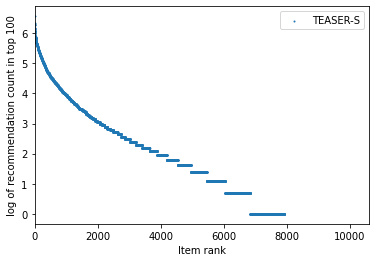

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)